## Assignment for fraud detection 
To address the case of predicting fraudulent transactions, we'll follow a structured approach, encompassing data cleaning, feature selection, model development, evaluation, and generating actionable insights

In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset 
df = pd.read_csv("Fraud.csv")

## The Features in the given dataset.

#step :- maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

#type : - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
#amount :- amount of the transaction in local currency.

#nameOrig :- customer who started the transaction

#oldbalanceOrg :- initial balance before the transaction

#newbalanceOrig :- new balance after the transaction

#nameDest: - customer who is the recipient of the transaction

#oldbalanceDest :- initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

#newbalanceDest: - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

#isFraud :- This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

#isFlaggedFraud : - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
#View the given dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Data Discription 
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
#change the type of given data
df.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Handle missing values 

In [9]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# From this we can say that there is no any null value in the given dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: title={'center': 'missing Values visualization in the dataset'}>

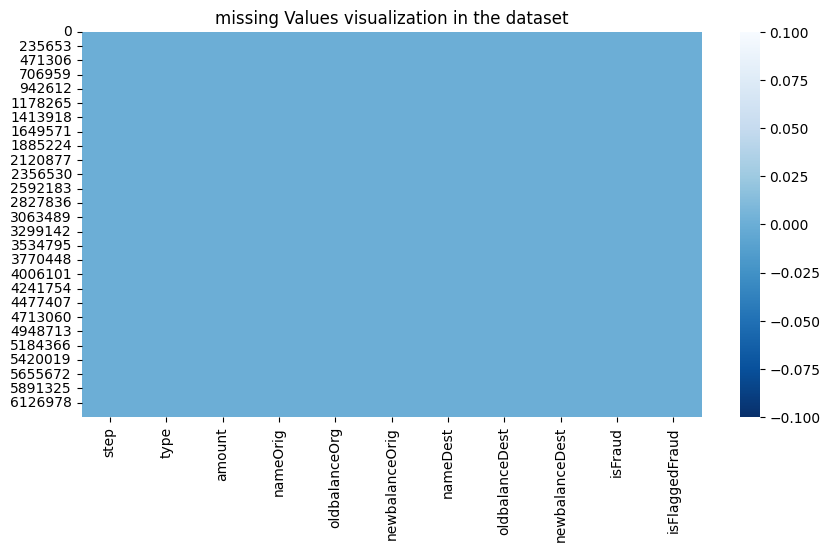

In [11]:
# To visualize the missing data we can use matplotlib

plt.figure(figsize = (10,5))
plt.title ("missing Values visualization in the dataset")
sns.heatmap(df.isnull(), cbar =True, cmap= "Blues_r")

In [12]:
# Check the unique value in the step column
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
#To check the entire shape of the data set
df.shape

(6362620, 11)

#Here in the dataset we have 6362620 rows and 11 columns

In [14]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Text(0, 0.5, 'count of online transaction ')

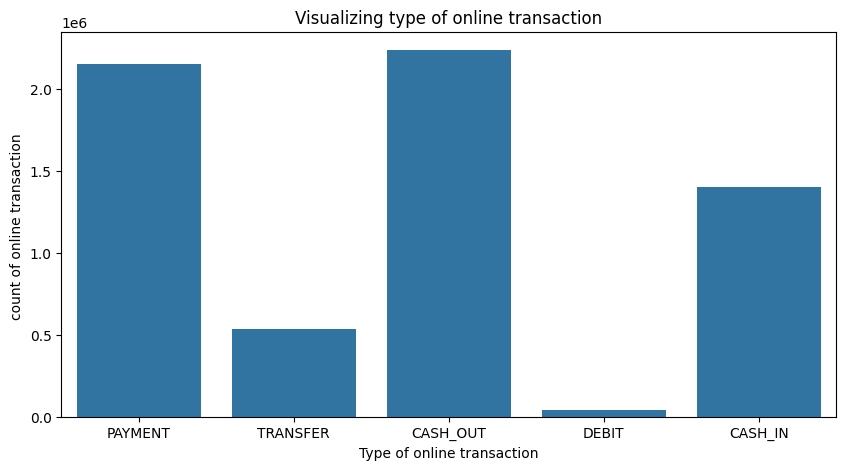

In [15]:
#visualize type of online transaction
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= df)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction ")

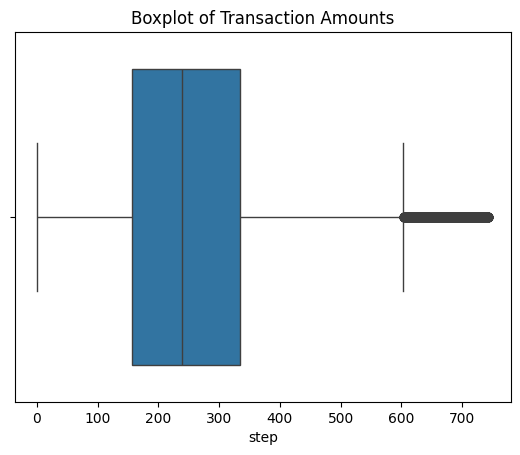

In [16]:
# Boxplot to visualize outliers in 'step'
sns.boxplot(x=df['step'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

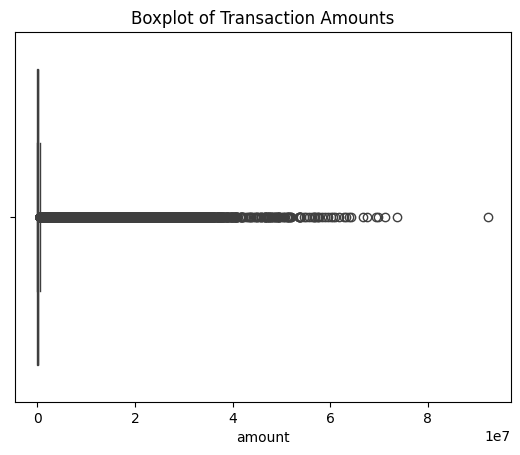

In [17]:
# Boxplot to visualize outliers in 'step'
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

<Axes: xlabel='type', ylabel='amount'>

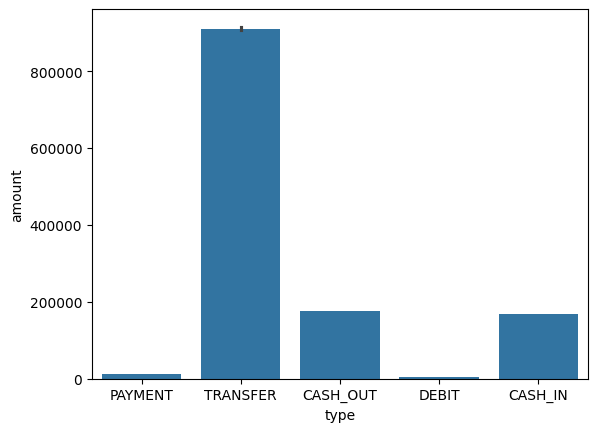

In [18]:
# Bivariate Analysis

sns.barplot(x='type',y='amount',data=df)

## In this chart, 'transfer' type has the maximum amount of money being transfered from customers to the recipient. Although 'cash out' and 'payment' are the most common type of transactions

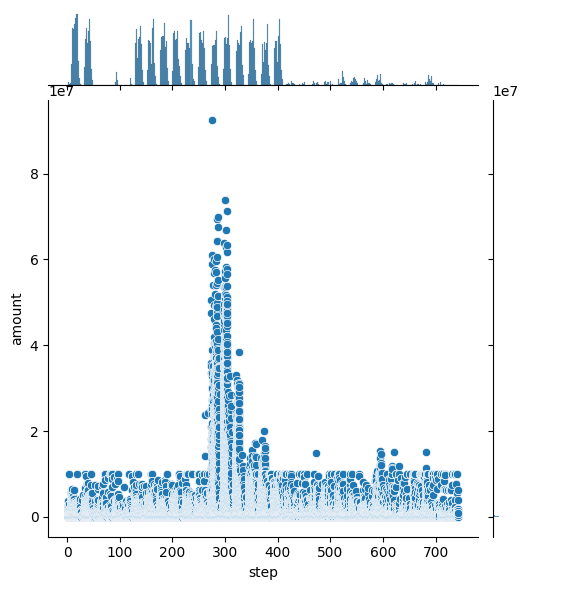

In [19]:
# Visualization between step and amount

sns.jointplot(x='step',y='amount',data=df)

## Visualization between amount and fraud_transaction_label

Text(0, 0.5, 'fraud_transaction_label')

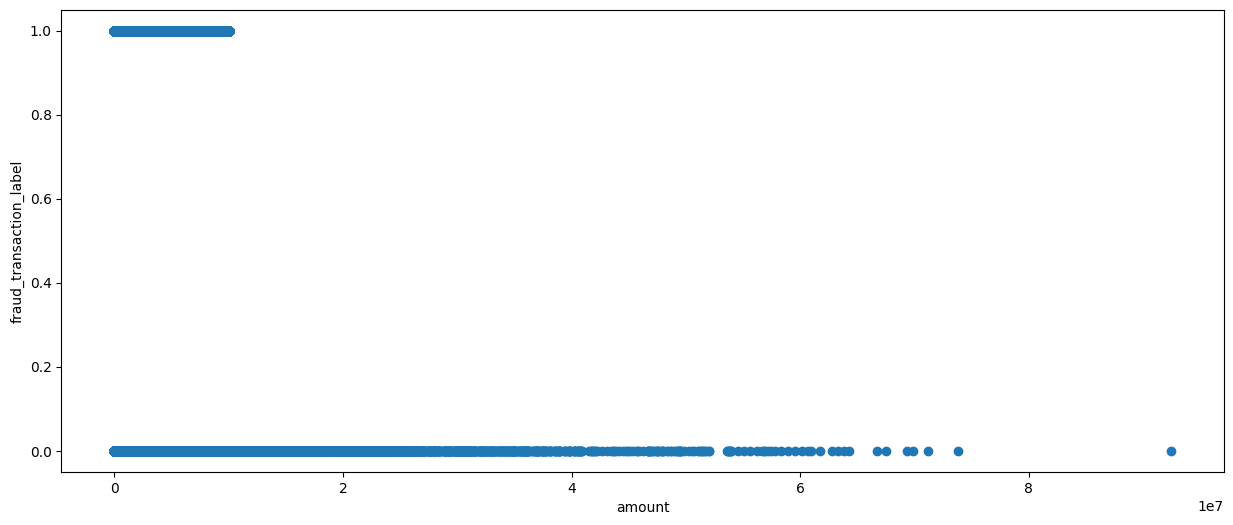

In [20]:
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='isFraud',data=df)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

## Visualization between type and isfraud_label

Text(0, 0.5, 'fraud_transaction_label')

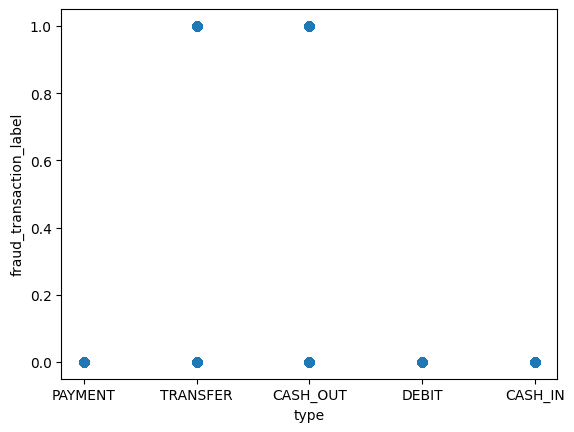

In [21]:
plt.scatter(x='type',y='isFraud',data=df)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

## Visualization between type and isfraud_label


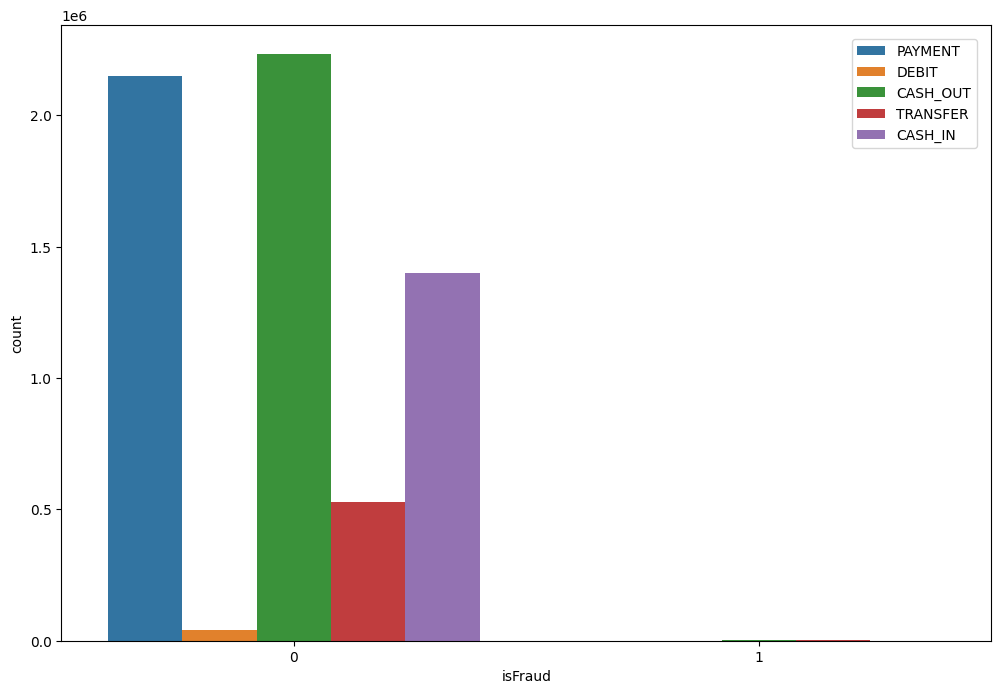

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=df,hue='type')
plt.legend(loc=[0.85,0.8])

## Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions

## PERFORMING FEATURE ENGINEERING
## Encoding categorical variables
Label Encoding Label encoding converts categorical variables into numerical values, assigning a unique integer to each category.
This method is simpler but can introduce unintended ordinal relationships between categories, which might not be appropriate for all types of data.

Crerating new feature to understanding and help to identifying fradulant behaviour 

In [23]:

type = df['type'].value_counts()
transaction = type.index
transaction

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object', name='type')

In [24]:
quantity = type.index
quantity

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object', name='type')

In [25]:
type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [26]:
# It will replace all the values from categorical to numerical
df.replace(to_replace =['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],value=[1,2,3,4,5],inplace = True)

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#See Above replace values

In [28]:
df['isFraud'] = df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [29]:
df['isFraud'].head(10)

0    No Fraud
1    No Fraud
2       Fraud
3       Fraud
4    No Fraud
5    No Fraud
6    No Fraud
7    No Fraud
8    No Fraud
9    No Fraud
Name: isFraud, dtype: object

## Variable Selection for training and testing

Variables can be selected based on:

Domain Knowledge: Understanding which features are likely to influence fraud.

Feature Importance: Using models like Random Forest which provide feature importance scores.

Correlation Analysis: Ensuring features have a reasonable correlation with the target variable without being highly correlated with each other. for training and testing.

Following are the variable that are need which is also call as independent variable i.e X and Y is the variable which is depend on all indeprendent variable so it is also called as target variable

In [30]:
# fro this project of fraud detection there is only four column need are as followes
#Splitting of dependent and independent variable are as :
x = df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y =df.iloc[:,-2]

In [31]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.0,160296.36
1,2,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,1,181.00,181.0,0.00
4,2,11668.14,41554.0,29885.86


In [32]:
y

0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
6362615       Fraud
6362616       Fraud
6362617       Fraud
6362618       Fraud
6362619       Fraud
Name: isFraud, Length: 6362620, dtype: object

To identify the key factors that predict fraudulent customers in our model,we analyze the feature importances provided by the Random Forest classifier
Random Forest models provide feature importance scores that indicate the contribution of each feature to the model's predictions. Higher importance scores suggest a stronger relationship with the target variable (isFraud).
## Train the Model and Extract Feature Importances

In [33]:
#import the libraries we will need Here we use Different model to check permormance of model and use better model for fulther process. 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [34]:
#Train test split( training on 80% while testing is 20%)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
X_train

,type,amount,oldbalanceOrg,newbalanceOrig
1906416,3,63025.16,619851.54,682876.71
5102428,1,181338.98,0.00,0.00
5504520,2,3753.50,0.00,0.00
4385370,2,1282.87,20633.00,19350.13
2353914,3,18354.19,15418704.93,15437059.11
...,...,...,...,...
5042192,3,429557.82,21067300.82,21496858.64
2683653,3,390214.19,3886556.35,4276770.54
1173851,1,193491.15,0.00,0.00
1470901,2,1919.99,676.00,0.00


In [36]:
y_test

3397777    No Fraud
2558238    No Fraud
3819208    No Fraud
1920201    No Fraud
3304008    No Fraud
             ...   
2140827    No Fraud
2573553    No Fraud
6215236    No Fraud
6063569    No Fraud
5302423    No Fraud
Name: isFraud, Length: 1272524, dtype: object

In [37]:
model = RandomForestClassifier()

## The model.fit method is used to train a machine learning model on a given dataset.

In [ ]:
model.fit(X_train,y_train)

In [39]:
model.score(X_test,y_test)

0.9997343861491021

## The model.predict method is used to make predictions on new data after a machine learning model has been trained.

In [42]:
model.predict([[3,63025.16,619851.54,682876.71]])

C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No Fraud'], dtype=object)

## Conclusion 
Upon training and evaluating our classification model, we found that the Random Forest model performed the best by a narrow margin.Random Forest: Achieved the best overall performance with a balance of accuracy and robustness to overfitting.

This project demonstrates the importance of a systematic approach to fraud detection, combining statistical analysis with machine learning techniques.

To determine if the implemented actions are working effectively, the following steps and metrics should be utilized:

1. A/B Testing
2. Performance Metrics
3. User Feedback
4. Continuous Improvement

Prevention Measures for Updating Company Infrastructure:
1. Data Security
2. Machine Learning Models
3. Employee Training and Awareness       